<a href="https://colab.research.google.com/github/atulchune/INR_STOCK_PRICE_prediction_Asterisc/blob/main/stock_price_prediction_asterisc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Task 2 Stock price prediction Supervised ML**

## **Project Type - Supervised Regression**

## **Contribution - Individual**



### **GitHub Link -https://github.com/atulchune/INR_STOCK_PRICE_prediction_Asterisc.git**

# **Project Summary -**
### **Project Goals and Objectives:**
The primary goal of this project is to develop a robust stock price prediction model using supervised machine learning techniques. This model aims to forecast future stock prices accurately, providing valuable insights for investors and traders. Key objectives include:

Providing a reliable tool for investors to make informed decisions about buying or selling stocks.
Assisting traders in identifying potential trading opportunities and managing risks.
Evaluating the performance of various machine learning algorithms for stock price prediction.
Assessing the impact of different features and data sources on prediction accuracy.
### **Importance of Stock Price Prediction:**
Stock price prediction is a critical task in the financial industry due to its potential to yield significant benefits:

**Investment Decision Support:** Investors can use accurate stock price predictions to optimize their portfolios, reduce risks, and enhance returns.

**Risk Management:** Traders and fund managers can employ these predictions to implement risk mitigation strategies, protecting their investments.

**Market Timing:** Predictions help in identifying the right time to enter or exit the market, maximizing profitability.

**Algorithmic Trading:** Automated trading systems rely on accurate price forecasts to execute buy/sell orders effectively.

## **Import Libraries**

In [ ]:
#Importing all the libarary

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Asterisc projects/INR=X.csv'
df=pd.read_csv(file_path)

### **Dataset First View**

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [ ]:
# Dataset Rows & Columns count
df.shape

(262, 7)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#drop Volume column
df = df.drop(columns=['Volume'])

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close,Adj Close
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,74.373533,74.631087,74.011048,74.358489,74.358489
std,1.417620,1.494521,1.311330,1.426245,1.426245
min,71.100403,71.279999,71.064003,71.099998,71.099998
25%,73.546175,73.706577,73.202003,73.531049,73.531049
50%,74.332001,74.531300,73.881748,74.275799,74.275799
75%,75.484551,75.737499,75.067053,75.489424,75.489424
max,77.684998,77.754997,76.496300,77.570000,77.570000


In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date         262
Open         255
High         247
Low          260
Close        257
Adj Close    257
dtype: int64

**Dataset contains Yes Bank stock monthly prices since it listed on stock exchange.**

Following are its features:-

* **Date:** In our data its monthly observation of stock since it listed.

* **Open:** The price a stock when the stock exchange open for the day.

* **High:** The maximum price of a stock attain during given period of time.

* **Low:** The minimum price of a stock attain during given period of time.

* **Close:** The price of a stock when the stock exchange closed for the day.

### **Outlier Detection**

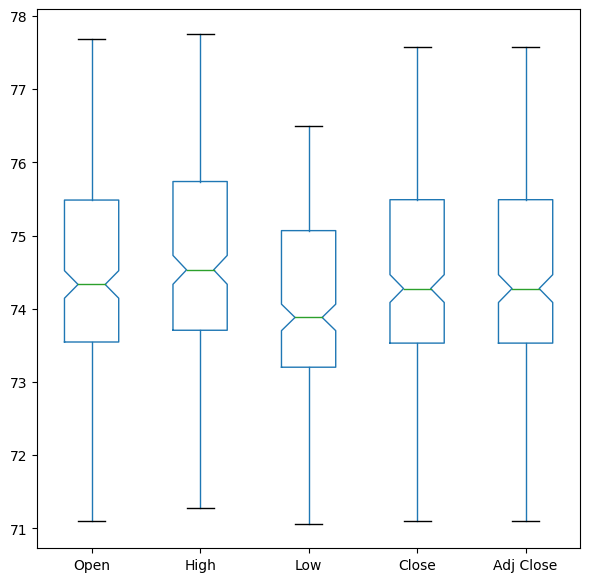

In [ ]:
# Write your code to make your dataset analysis ready.
fig = plt.figure(figsize =(7, 7))
boxplot = df.boxplot(column=['Open','High','Low',"Close","Adj Close"],grid=False,notch=True)


In [ ]:
# Convert 'date_column' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
dtype: object

#### **Plotting bar graph of Closing Price wrt Year**

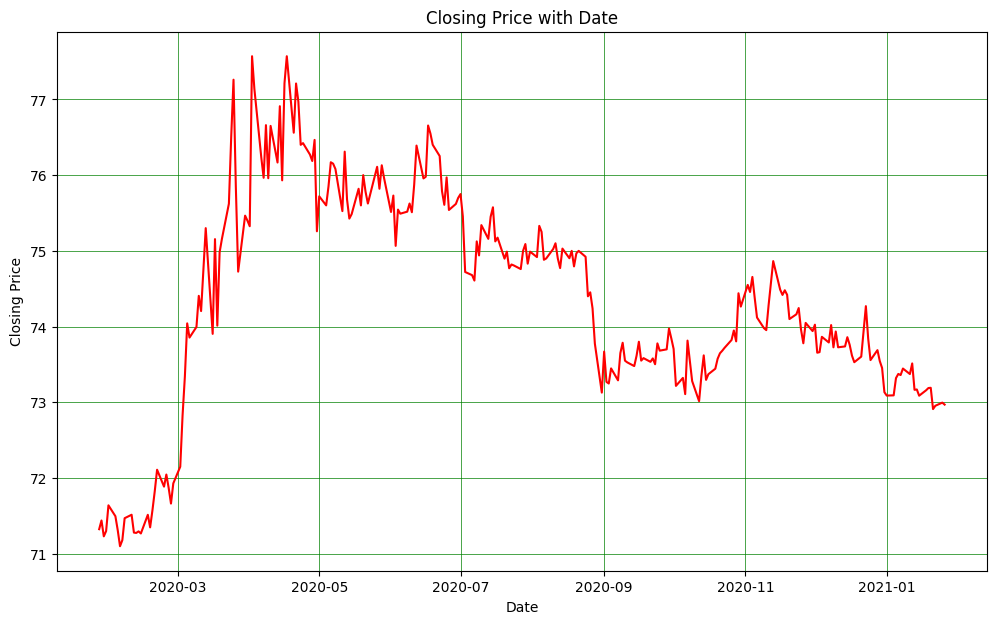

In [ ]:
#Plotting bar graph Yes Bank closing price with respect to Year
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Close'] ,color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

#### **Plotting line graph of Date and other parameters**

In [ ]:
#Plotting line graph wrt Date and other parameters
import plotly.express as px


fig =px.line(df, x="Date", y="Low")
fig.add_scatter(x=df['Date'], y=df['Open'])
fig.add_scatter(x=df['Date'], y=df['Close'])
fig.add_scatter(x=df['Date'], y=df['High'])
fig.update_layout(
    #update_font(),
    title="Yes Bank prices with respect to Year",
    xaxis_title="Year",
    yaxis_title="Price",
)
fig.show()

####**Distribution of dependent variable Close Price of stock.**

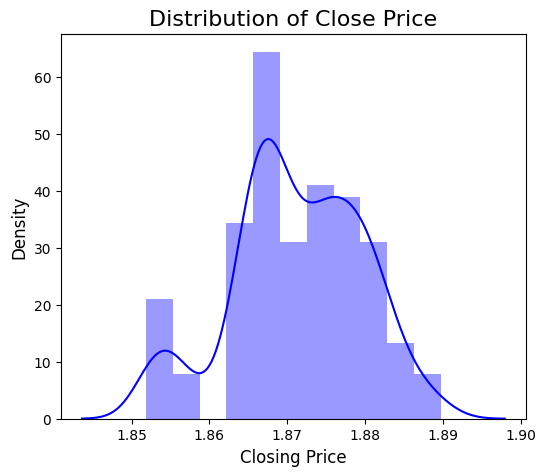

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [ ]:
#transformation of distribution of close variable
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
df.columns

It is rightly skewed distribution.

need to go with log transformation to make it normal distribution

**Transformation :**

Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [ ]:

# List of independent features
numerical_features = df.describe().columns
numerical_features

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

#### **Distribution of numerical features High, Low and Open price of stock.**

<function matplotlib.pyplot.show(close=None, block=None)>

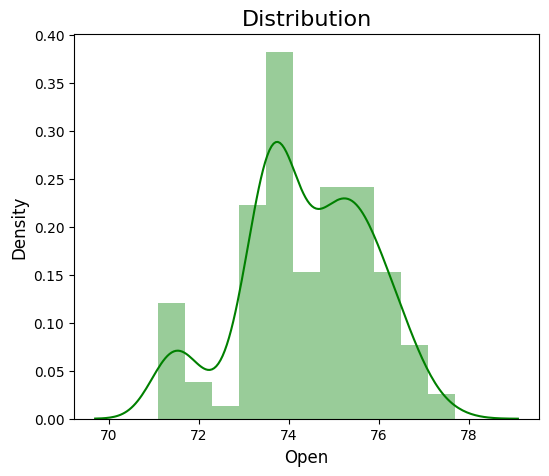

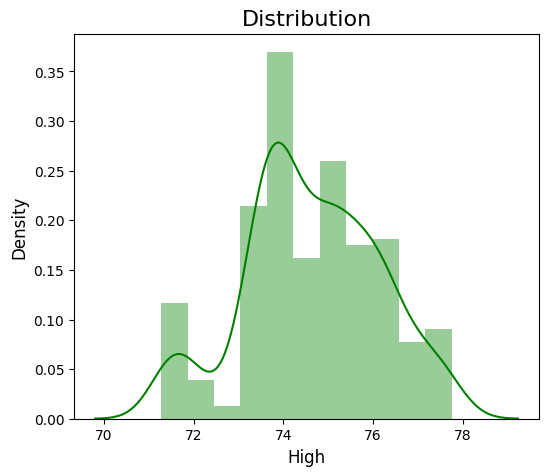

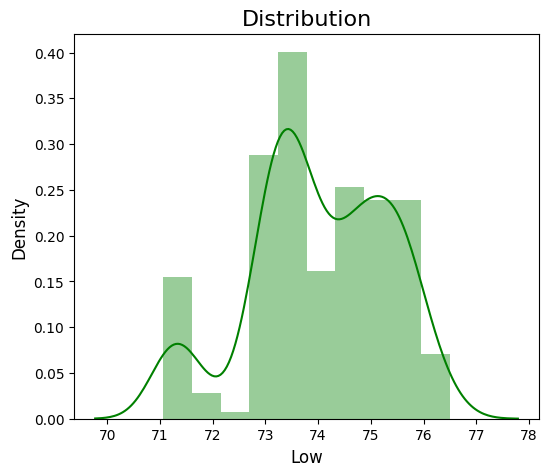

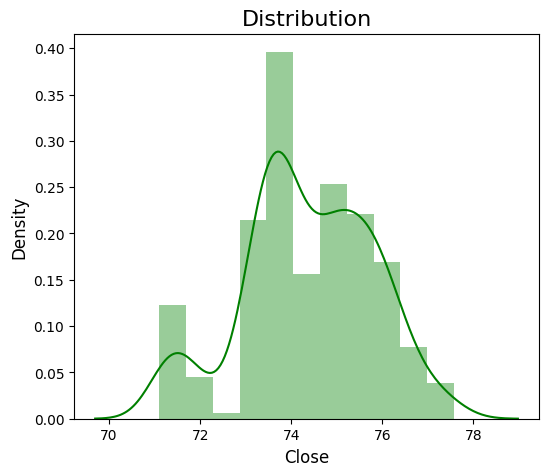

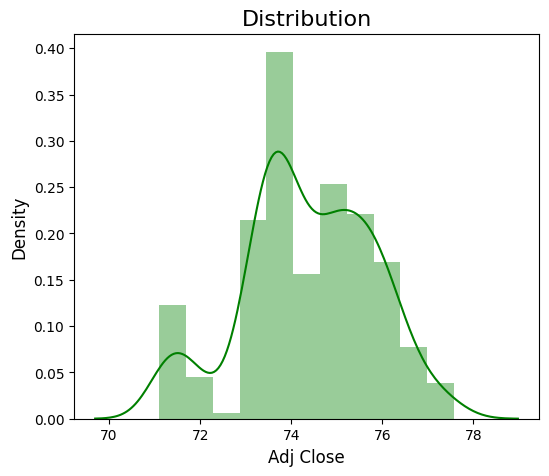

In [ ]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

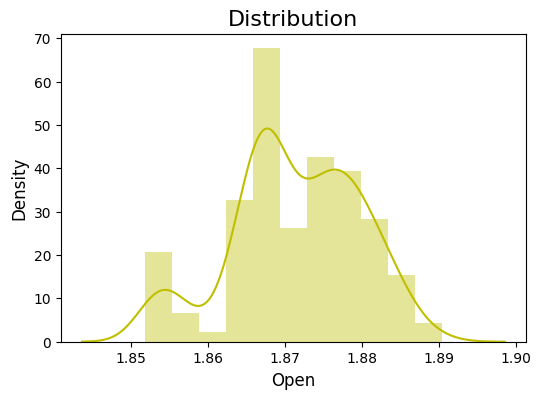

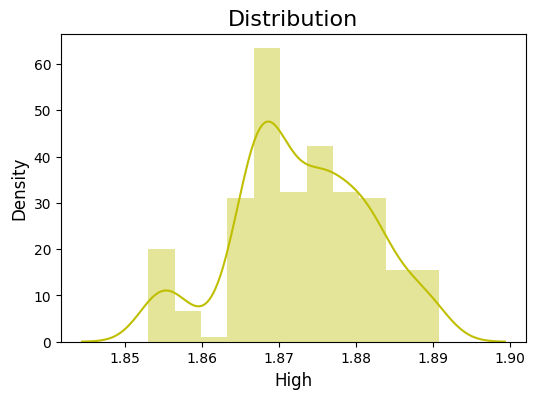

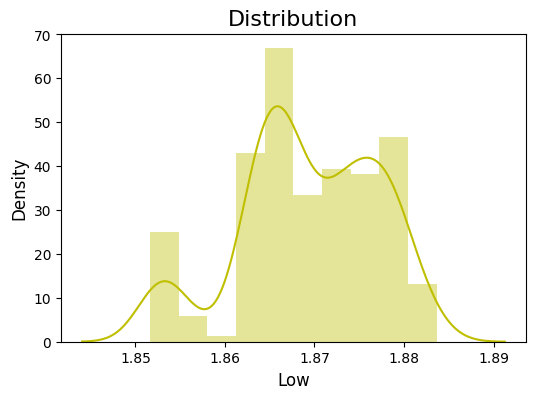

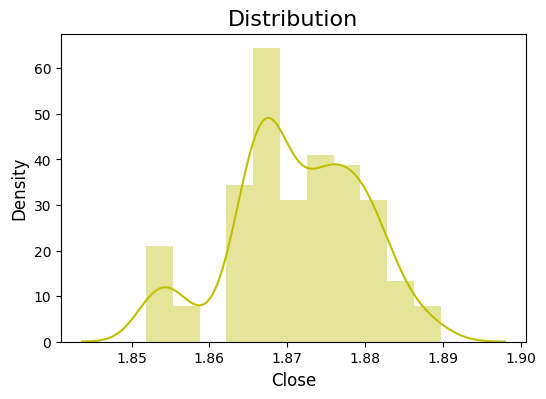

In [ ]:
# Applying log transformation
for col in numerical_features[:-1]:
  plt.figure(figsize=(6,4))
  ax = sns.distplot(np.log10(df[col]),color="y")
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
plt.show()

### **Scatter Plot to see the Best Fit**
**Best Fit Line:-** A line of best fit is a straight line that is the best approximation of the given set of data. It is used to study the nature of the relation between two variables.

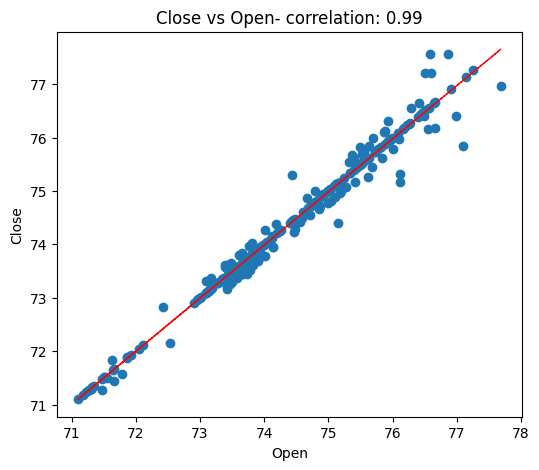

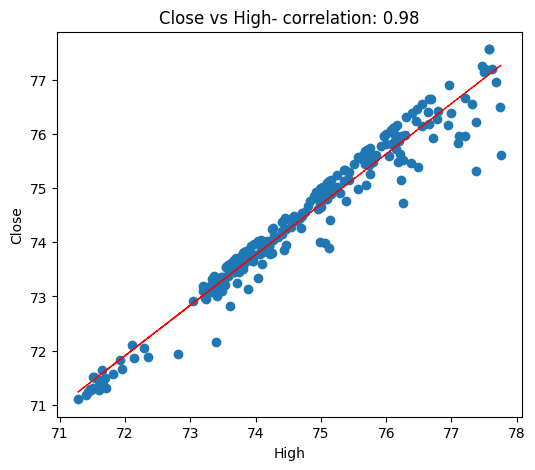

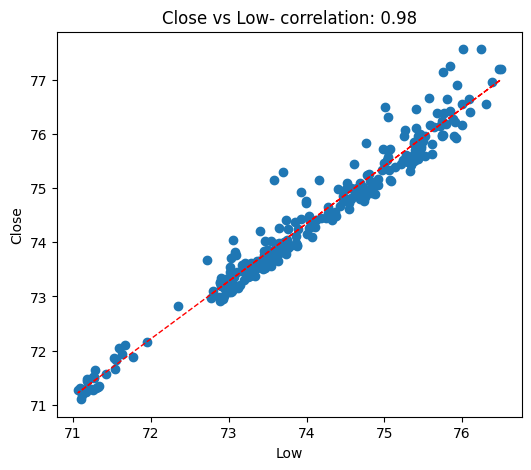

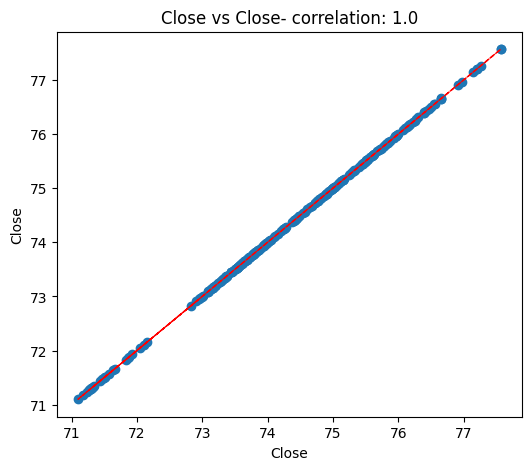

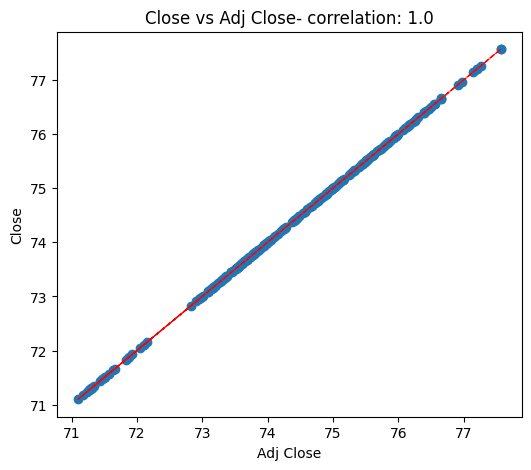

In [ ]:
# checking for heteroscedacity.
for col in numerical_features:
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(round(correlation,2)))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

### **Checking Correlation between variables**

<Axes: >

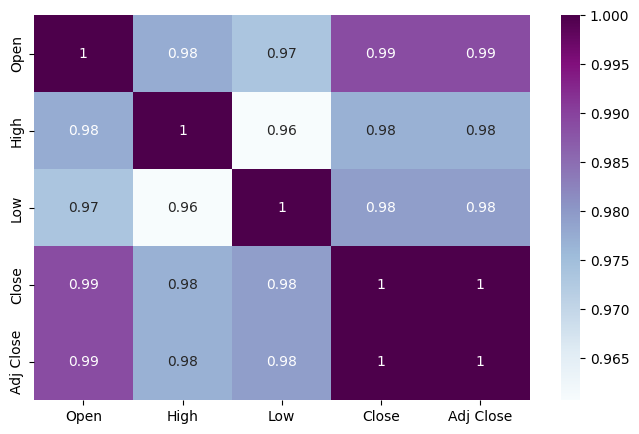

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')


* There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

* To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

* So, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

**VIF:-** The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(df[[i for i in numerical_features if i not in ['Date','Close']]])

,variables,VIF
0,Open,146073.984982
1,High,61863.717967
2,Low,64622.728846
3,Adj Close,172566.087538


In [ ]:
df_copy = df.copy()
df_copy.shape

(262, 6)

## **Data Preparation :-**

We can see the correlation among high,low,open is vary high. SO i have selected only pivot, which is the average of all high,low and open.

In [ ]:
X = df_copy.drop(columns=['Close','Date'])
y = df_copy['Close']

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#shape of training dataset.
X_train.shape

(209, 4)

In [ ]:

#shape of testing dataset.
X_test.shape


(53, 4)

### ***ML Model Implementation***

## **Linear Regression**
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting

In [ ]:
#fit data into Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 4)

0.9999

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 4)

0.9999

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred


array([1.86279054, 1.85315873, 1.8746921 , 1.88354318, 1.86878405,
       1.87803511, 1.86774791, 1.86381248, 1.86513937, 1.88081872,
       1.86441596, 1.87182236, 1.87862975, 1.87327836, 1.86732487,
       1.87485944, 1.86646775, 1.85529336, 1.87926488, 1.88789116,
       1.86654567, 1.87654843, 1.88178922, 1.86473225, 1.8659216 ,
       1.86536345, 1.87808211, 1.86505766, 1.87576604, 1.87518274,
       1.86311013, 1.87821411, 1.86523745, 1.87273719, 1.87590627,
       1.86751334, 1.86800748, 1.865903  , 1.86923632, 1.86539767,
       1.88162356, 1.86648841, 1.86709265, 1.8645898 , 1.86943416,
       1.86788344, 1.87578637, 1.87445973, 1.88058119, 1.87152138,
       1.85638205, 1.87754552, 1.86786453])

In [ ]:

np.array(y_test)

array([1.86279244, 1.85293905, 1.87471313, 1.88346267, 1.86885186,
       1.87802287, 1.86781975, 1.86384371, 1.86522246, 1.88072787,
       1.86446303, 1.87187928, 1.87856662, 1.87346942, 1.86736379,
       1.87495703, 1.86653841, 1.85515557, 1.87926797, 1.88768763,
       1.86658679, 1.87679499, 1.88167732, 1.86479872, 1.86596814,
       1.86540485, 1.87804875, 1.86508148, 1.87578449, 1.87520486,
       1.86314435, 1.87820571, 1.86535277, 1.87278305, 1.87598503,
       1.86758533, 1.86808578, 1.86595515, 1.86934906, 1.86545933,
       1.88155581, 1.86658269, 1.86717276, 1.86461195, 1.86951801,
       1.86793806, 1.87578391, 1.87449806, 1.88061295, 1.87160795,
       1.85629074, 1.87752223, 1.86792921])

In [ ]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [ ]:

test_df[' Predicted Closing Price'] = 10**y_pred

test_df.head()


,Actual Closing Price,Predicted Closing Price
258,72.910896,72.910579
12,71.275299,71.311362
118,74.939903,74.936274
67,76.464996,76.479172
236,73.935303,73.923761


In [ ]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))

MSE : 0.0
RMSE : 0.0001
MAE : 0.0001
MAPE : 0.0
R2 : 0.9999


**Linear Regression: Actual Vs. Predicted**

Lets know actual and model predicted curve

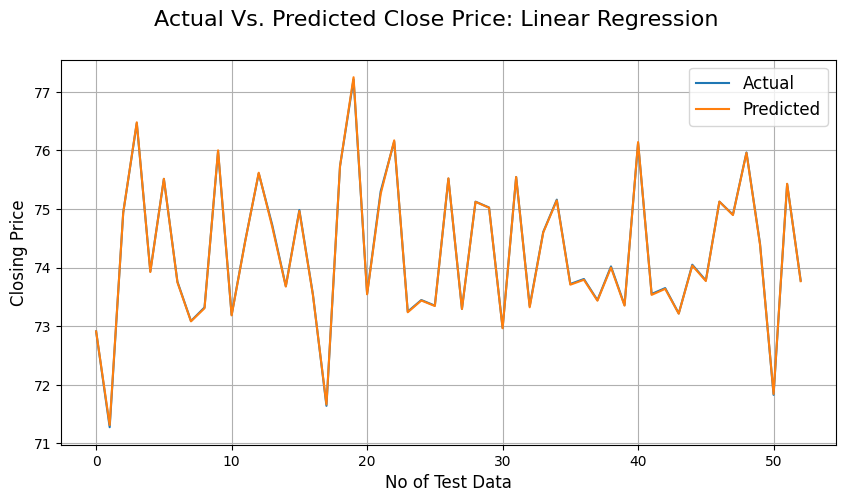

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()